선형대수는 벡터 공간을 다루는 수학의 한 분야.

4.1 벡터
벡터 : 어떤 유한한 차원의 공간에 존재하는 점들; 대부분의 데이터 특히 숫자로 표현된 데이터는 벡터로 표현 가능 (e.g. 키, 몸무게, 나이)

In [8]:
height_weight_age = [70, # 인치
                    170, # 파운드
                    40]  # 나이
grades = [95, # 시험1 점수
         80,  # 시험2 점수
         75,  # 시험3 점수
         62]  # 시험4 점수

In [9]:
v = [x for x in range(1, 11,2)]
w = [y for y in range(11, 21,2)]

In [10]:
# 연산은 zip을 사용하여 두 벡터를 묶은 뒤, 두 배열의 각 성분을 연산한다.
def vector_add(v, w):
    return [v_i+w_i for v_i, w_i in zip(v,w)]

def vector_subtract(v,w):
    return [v_i-w_i for v_i, w_i in zip(v,w)]

In [19]:
vector_add(v,w)

[12, 16, 20, 24, 28]

In [21]:
# Numpy version
import numpy as np
np.array(v) + np.array(w)

array([12, 16, 20, 24, 28])

In [23]:
# 벡터 덧셈의 속도 비교, Numpy의 속도가 더 빠른 것을 확인할 수 있음
%timeit vector_add(v, w)
%timeit np.array(v) + np.array(w)

1.35 µs ± 161 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
3.9 µs ± 223 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [24]:
vector_subtract(v,w)

[-10, -10, -10, -10, -10]

In [25]:
# Numpy version
np.array(v) - np.array(w)

array([-10, -10, -10, -10, -10])

In [16]:
from functools import partial, reduce

In [46]:
# 벡터로 구성된 list에서 모든 벡터의 각 성분을 연산하고 싶을 경우,
# 누적합
def vector_sum(vectors):
    result = vectors[0]
    
    for v in vectors[1:]:
        result = vector_add(result, v)
    
    return result

# 간략화1
def vector_sum2(vectors):
    return reduce(vector_add, vectors)

# 간략화2
vector_sum = partial(reduce, vector_add)

vector_sum([v,v,v,v])
vector_sum2([v,v,v,v])

[4, 8, 12, 16]

In [41]:
# 벡터 스칼라 곱
def scalar_multiply(c,v):
    # c : 숫자, v : 벡터
    return [c * v_i for v_i in v]

v = [5,6,7,8]
scalar = 3

scalar_multiply(scalar, v)

[15, 18, 21, 24]

In [42]:
# Numpy version: Numpy는 배열의 크기가 다르더라도 기본적인 vector연산을 가능하도록 지원해준다. 이를 broadcasting이라고 함
scalar * np.array(v)

array([15, 18, 21, 24])

In [44]:
# 각 성분별 평균
def scalar_mean(vectors):
    # i번째 성분이 입력된 벡터의 i번쨰 성분의 평균을 의미하는 벡터를 계산
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

v = [1,2,3,4]
w = [-4,-3,-2,-1]

scalar_mean([v,v,v,v])

[1.0, 2.0, 3.0, 4.0]

In [48]:
# 벡터 내적
def dot(v, w):
    # v_1 * w_1 + ... + v_n * w_n
    return sum(v_i*w_i for v_i,w_i in zip(v,w))

v = [1,2,3,4]
w = [-4,-3,-2,-1]

dot(v,w)

-20

In [49]:
# Numpy version
np.dot(v,w)

-20

In [50]:
# 내적의 개념을 사용한, 각 성분의 제곱 합
def sum_of_squares(v):
    # v_1 * v_1 + ... + v_n*v_n
    return dot(v,v)

v = [1,2,3,4]
sum_of_squares(v) # v * v = [1,4,9,16]

30

In [52]:
# Numpy version
np.dot(v,v) # or sum(np.square(v))

30

In [53]:
import math

In [56]:
# 제곱값의 합을 이용하여 벡터의 크기 계산
def magnitude(v):
    return math.sqrt(sum_of_squares(v)) # math.sqrt는 제곱근을 계산해 주는 함수

v = [1,2,3,4]
magnitude(v)

5.477225575051661

In [57]:
# Numpy version
np.linalg.norm(v)

5.477225575051661

In [64]:
# 두 벡터간의 거리 구하는 공식
# math.sqrt((math.pow(v1)-(math.pow(w1)))+...+(math.pow(vn)-(math.pow(wn))))
def sqared_distance(v,w):
    # (v_1 - w_1)**2 + ... + (v_n - w_n)**2
    return sum_of_squares(vector_subtract(v,w))

def distance(v,w):
    return math.sqrt(sqared_distance(v,w))

v = [1,2,3,4]
w = [-4,-3,-2,-1]

sqared_distance(v,w)

distance(v,w)

# 간략화
def distance(v,w):
    return magnitude(vector_subtract(v,w))

distance(v,w)

10.0

In [65]:
# Numpy version
np.linalg.norm(np.subtract(v,w)) # or np.sqrt(np.sum(np.subtract(v,w)**2))

10.0

4.2 행렬
행렬 : 2차원으로 구성된 숫자의 집합, list의 list로 표현 (e.g. A[i][j]는 i번째 행과 j번째 열에 속한 숫자)

In [66]:
A = [[1,2,3,], # 2개의 행과 3개의 열
     [4,5,6]]
B = [[1,2], # 3개의 행과 2개의 열
    [3,4],
    [5,6]]

In [72]:
# shape : matrix의 크기를 구함
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

shape(A)

(2, 3)

In [75]:
# Numpy version 
np.shape(A)

(2, 3)

In [76]:
# get _row : matrix에서 하나의 row를 추출
def get_row(A,i):
    return A[i]

get_row(A,1)

[4, 5, 6]

In [79]:
# Numpy version 
matrix = np.array(A)
matrix[0] #row slicing

array([1, 2, 3])

In [78]:
# get_column : matrix에서 하나의 column을 추출
def get_column(A, j):
    return [A_i[j]         # A_i 행의 j번째 원소
            for A_i in A]  # 각 A_i 행에 대해

get_column(A,2)

[3, 6]

In [81]:
# Numpy version
matrix[:,2] #row slicing

array([3, 6])

In [83]:
# 형태가 주어졌을 때, 형태에 맞는 행렬을 생성 후 각 원소를 채워넣는 함수
# entry_fn을 기준으로 num_rows와 num_cols를 생성
def make_matrix(num_rows, num_cols, entry_fn):
    # (i,j)번째 원소가 entry_fn(i,j)인
    # num_rows * num_cols list를 반환
    return [[entry_fn(i,j)            # i가 주어졌을 때 list 생성 
            for j in range(num_cols)] # [entry_fn(1,0), ...]
            for i in range(num_rows)] # 각 i에 대해 하나의 lust를 생성

# 대각선의 원소는 1이고 나머지는 0인 대각행렬을 생성
def is_diagonal(i,j):
    # 대각선은 1, 나머지는 0
    return 1 if i == j else 0

identify_matrix = make_matrix(5, 5, is_diagonal)
identify_matrix

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

In [84]:
# Numpy version
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [88]:
# 다음과 같이 표현된 네트워크가
friendships = [(0,1), (0,2), (1,2), (1,3), (2,3), (3,4),
               (4,5), (5,6), (5,7), (6,8), (7,8), (8,9)]

# 아래와 같이 행렬도로 표현될 수 있다.
friendships = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0], # user 0
               [1, 0, 1, 1, 0, 0, 0, 0, 0, 0], # user 1
               [1, 1, 0, 1, 0, 0, 0, 0, 0, 0], # user 2
               [0, 1, 1, 0, 1, 0, 0, 0, 0, 0], # user 3
               [0, 0, 0, 1, 0, 1, 0, 0, 0, 0], # user 4
               [0, 0, 0, 0, 1, 0, 1, 1, 0, 0], # user 5
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 6
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 7
               [0, 0, 0, 0, 0, 0, 1, 1, 0, 1], # user 8
               [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]] # user 9

friendships[0][2] == 1 # 참, 사용자 0과 사용자 2는 친구다
friendships[0][8] == 0 # 거짓, 사용자 0과 사용자 8은 친구가 아니다

True

In [101]:
def matrix_add(A,B):
    if shape(A) != shape(B):
        raise ArithmeticError("cannot add matrices with different shapes")
        
    num_rows, num_cols = shape(A)
    def entry_fn(i,j): return A[i][j] + B[i][j]

    return make_matrix(num_rows, num_cols, entry_fn)

In [102]:
A = [[ 1., 0., 0.], [ 0., 1., 2.]]
B = [[ 5., 4., 3.], [ 2., 2., 2.]]

matrix_add(A,B)

[[6.0, 4.0, 3.0], [2.0, 3.0, 4.0]]

In [104]:
# Numpy version
np.add(A,B) # vector 마찬가지로 크기 같은 matrix 형태의 list가 돌아오면 자동으로 변환함

array([[6., 4., 3.],
       [2., 3., 4.]])

In [110]:
import matplotlib.pyplot as plt
def make_graph_dot_product_as_vector_projection(plt):
    v = [2,1]
    w = [math.sqrt(.25), math.sqrt(.75)]
    c = dot(v,w)
    vonw = scalar_multiply(c,w)
    o = [0,0]
    
    plt.arrow(0,0, v[0], v[1],
             width = 0.002, head_width = .1, length_includes_head = True)
    plt.annotate("v", v, xytext = [v[0] + 0.1, v[1]])
    plt.arrow(0,0, w[0], w[1],
             width = 0.002, head_width= .1, length_includes_head = True)
    plt.annotate("w", w, xytext=[w[0] - 0.1, w[1]])
    plt.arrow(0, 0, vonw[0], vonw[1], length_includes_head=True)
    plt.annotate(u"(v•w)w", vonw, xytext=[vonw[0] - 0.1, vonw[1] + 0.1])
    plt.arrow(v[0], v[1], vonw[0] - v[0], vonw[1] - v[1], 
              linestyle='dotted', length_includes_head=True)
    plt.scatter(*zip(v,w,o),marker='.')
    plt.axis([0,2,0,2])
    plt.show()

Populating the interactive namespace from numpy and matplotlib


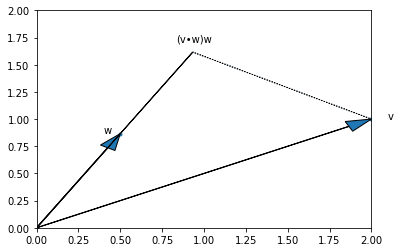

In [111]:
%pylab inline
make_graph_dot_product_as_vector_projection(plt)

Reference : 
1. 밑바닥부터 시작하는 데이터과학 4장, 
2. https://github.com/newhiwoong/DATA_SCIENCE_FROM_SCRATCH/blob/master/data-science-from-scratch-master/notebook/ch04_linear_algebra.ipynb